<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/YOLO3_4_Py_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
!pip install yolo34py-gpu
!git clone https://github.com/madhawav/YOLO3-4-Py.git
!wget http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
!sh YOLO3-4-Py/tools/download_models.sh

     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for yolo34py-gpu: filename=yolo34py_gpu-0.2-cp37-cp37m-linux_x86_64.whl size=707459 sha256=ff75fedf5218efbc03f57fa250c8ce6ac685e3e00bd94630bca021c9db301911
  Stored in directory: /root/.cache/pip/wheels/04/b4/f4/9945ffc29ce14c99c43a7815e85ce921eeb6cd918507f45816
Successfully built yolo34py-gpu
Cloning into 'YOLO3-4-Py'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 419 (delta 40), reused 46 (delta 19), pack-reused 341
Receiving objects: 100% (419/419), 6.05 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (228/228), done.
--2021-03-18 04:52:01--  http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
Resolving absfreepic.com (absfreepic.com)... 107.182.231.252
Connecting to absfreepic.com (absfreepic.com)|107.182.231.252|:80... connected.
HTTP request sent, awaiting resp

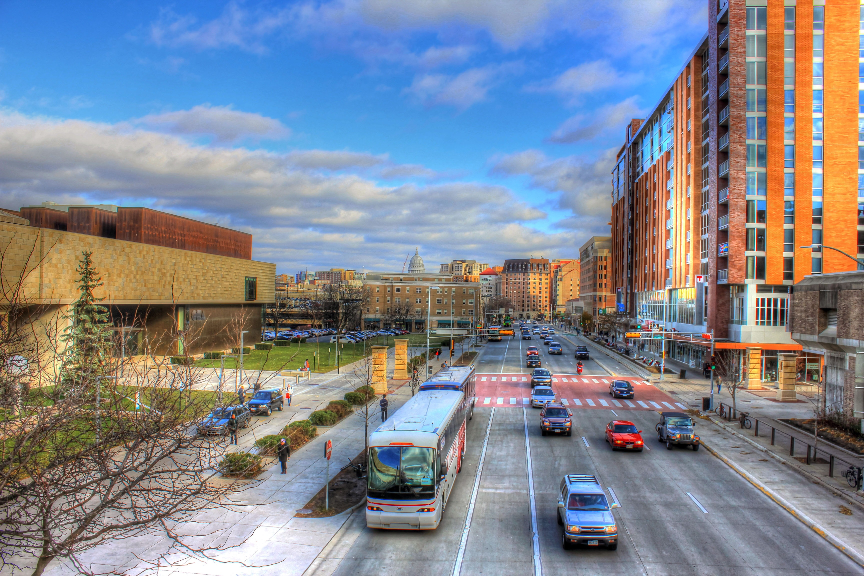

In [ ]:
import cv2
img = cv2.imread('./cars-on-busy-street-3456x2304_73674.jpg')
img = cv2.resize(img, None, fx=0.25, fy=0.25)
import PIL
pil_image = PIL.Image.fromarray(img[:,:,::-1])
pil_image

In [ ]:
from pydarknet import Detector, Image
net = Detector(bytes("./cfg/yolov3.cfg", encoding="utf-8"), bytes("./weights/yolov3.weights", encoding="utf-8"), 0, bytes("./cfg/coco.data",encoding="utf-8"))

In [ ]:
img_darknet = Image(img)
results = net.detect(img_darknet)

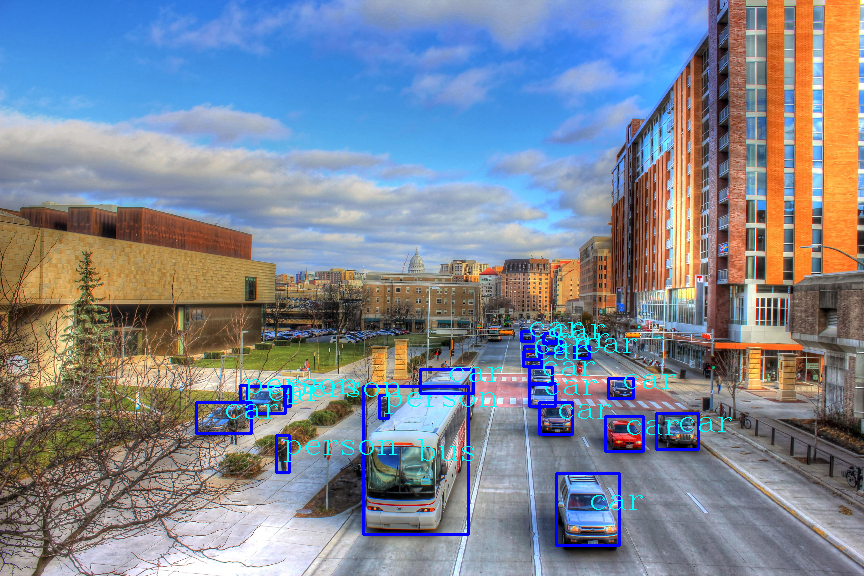

In [ ]:
img_output = img.copy()
for category, score, bounds in results:
    x, y, w, h = bounds
    cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
    cv2.putText(img_output, category, (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0))

pil_image_output = PIL.Image.fromarray(img_output[:,:,::-1])
pil_image_output